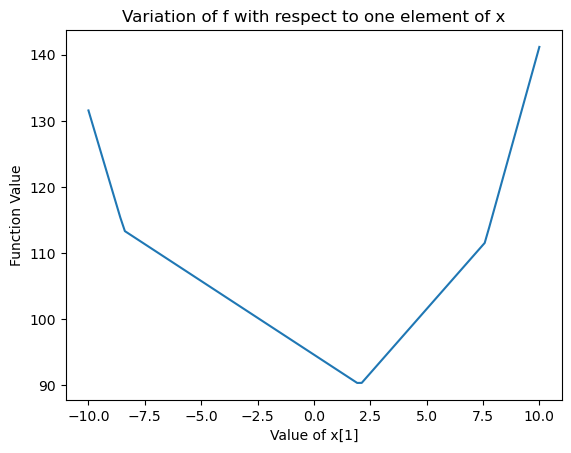

In [320]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def f(x, a, b):
    abs_values = np.zeros(500)
    R = np.matmul(a.T, x.flatten()) + b.flatten()
    for i in range(500):
        abs_values[i] = np.abs(R[i])
    return np.max(abs_values)
    
m = 500
n = 50
x_example = np.ones(n)
a_example = np.random.normal(0, 4, (n, m))
b_example = np.random.normal(0, 4, (m, 1))

# Choose one element of x to vary
element_to_vary = 1
x_values = np.linspace(-10, 10, 100)  # Generate a range of values for the chosen element
f_values = [f(x_example, a_example, b_example) for x_example[element_to_vary] in x_values]

# Plot the values
plt.plot(x_values, f_values)
plt.xlabel(f'Value of x[{element_to_vary}]')
plt.ylabel('Function Value')
plt.title('Variation of f with respect to one element of x')
plt.show()

In [321]:
def gradient(f, x, input_size, a, b):
    h = 1e-10
    grad = np.zeros((input_size, 1))
    for i in range(input_size):
        delta = np.zeros((input_size, 1))
        delta[i][0] = h
        grad[i][0] = (f(x + delta, a, b) - f(x, a, b)) / h
    return grad

def projected_gradient(c):
    inv = np.linalg.inv(c @ c.T)
    prj = np.eye(50) - (c.T @ inv @ c)
    return prj

In [322]:
x0 = 10 * np.ones((50, 1))
a = np.array(np.random.normal(0 , 4 , (50 , 500)))
c = np.array(np.random.normal(0, 4, (50,1)))
b = np.random.normal(0 , 4 , (1 , 500))
d = np.random.normal(0, 4, 1)

R = (a.T @ x0) + b.T

R[55]

array([-55.98353257])

Iteration	differential Value				Function Value
1	833.6221295870874
2	832.0006175996403
3	830.378973659645
4	828.7576822078591
5	827.1361484528538
6	825.5142401586427
7	823.8927503488088
8	822.2714149074
9	820.6499690033505
10	819.0285669161156
11	817.4072753438962
12	815.786335935911
13	814.1652641748396
14	812.5437519863281
15	810.9225484672459
16	809.3007280851285
17	807.6794366217299
18	806.0582550814532


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


19	804.4365012578324


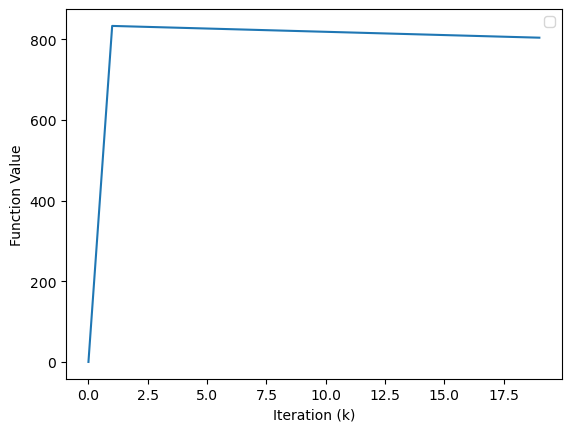

In [323]:
def gradient_descent_alpha(f, x0, max_iter, tol, a, b, c, d):
    x = x0.reshape(-1, 1)
    input_size = len(x)
    val = np.zeros(max_iter)
    x_history = [x.flatten()]
    print("Iteration\tdifferential Value\t\t\t\tFunction Value")

    for k in range(1, max_iter):
        step = 0.00001
        x = x - step * (projected_gradient(c) @ gradient(f, x, 50, a, b))
        val[k] = f(x, a, b)
        x_history.append(x.flatten())
        print(f"{k}\t{val[k]}")
        # Check for convergence
        if np.linalg.norm(gradient(f, x, input_size, a, b)) < tol:
            break
    return x, val[:k+1], np.array(x_history)


minimizer, values, x_history = gradient_descent_alpha(f, x0, 20, 1e-10, a , b , c , d)
plt.plot(range(len(values)), values)
plt.xlabel('Iteration (k)')
plt.ylabel('Function Value')
plt.legend()
plt.show()

Iteration	differential Value				Function Value
1	161311.5741417843
2	41472.68382036972
3	53203.784860858366
4	25969.301673890164
5	45821.94879007457
6	20087.908778697285
7	41465.90754145449
8	16909.577844408246
9	37305.23715728941
10	14550.634308588365
11	34095.26464213105
12	12713.84277925744
13	32405.363914291724
14	10874.840446191547
15	31219.820537641815
16	9758.556556108488
17	29714.121513503593


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


18	8222.509471747402
19	28872.48357392384


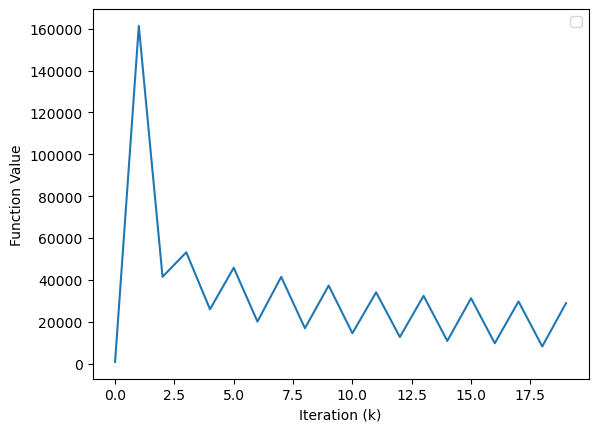

In [324]:
def gradient_descent_alpha(f, x0, max_iter, tol, a, b, c, d):
    x = x0.reshape(-1, 1)
    input_size = len(x)
    val = np.zeros(max_iter)
    val[0] = f(x, a, b)
    x_history = [x.flatten()]
    print("Iteration\tdifferential Value\t\t\t\tFunction Value")
    # print(f"0\t\t{x.flatten()}\t\t{val[0]}")

    for k in range(1, max_iter):
        step = 1/np.sqrt(k)
        x = x - step * (projected_gradient(c) @ gradient(f, x, 50, a, b))
        val[k] = f(x, a, b)
        x_history.append(x.flatten())
        # print(f"{k}\t\t{step * (projected_gradient(c) @ gradient(f, x, 50, a, b))}\t{val[k]}")
        print(f"{k}\t{val[k]}")
        # Check for convergence
        if np.linalg.norm(gradient(f, x, input_size, a, b)) < tol:
            break
    return x, val[:k+1], np.array(x_history)

minimizer, values, x_history = gradient_descent_alpha(f, x0, 20, 1e-10, a , b , c , d)
plt.plot(range(len(values)), values)
plt.xlabel('Iteration (k)')
plt.ylabel('Function Value')
plt.legend()
plt.show()

Iteration	differential Value				Function Value
1	161311.5741417843
2	76572.68214564113
3	22991.74501993096
4	18021.94190808971
5	14436.558935654633
6	12600.399489573443
7	10533.826298423208
8	9646.96149805311
9	8342.472696484045
10	7823.322322320097
11	6938.495914373732
12	6578.5279255198075
13	5895.998542226663
14	5678.680932153118
15	5123.175586962802
16	5036.574187353867
17	4527.644186113105


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


18	4451.409483126257
19	4070.810960519779


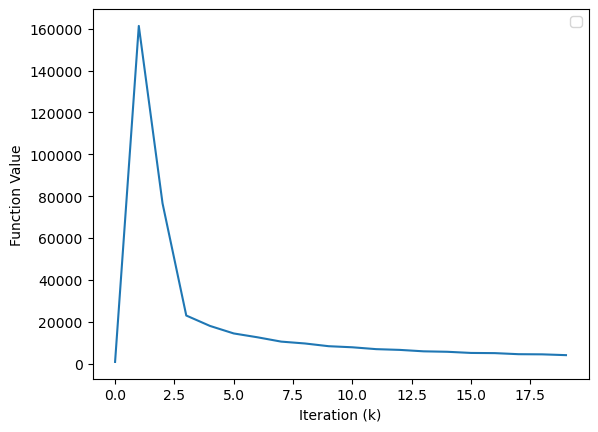

In [325]:
def gradient_descent_alpha(f, x0, max_iter, tol, a, b, c, d):
    x = x0.reshape(-1, 1)
    input_size = len(x)
    val = np.zeros(max_iter)
    val[0] = f(x, a, b)
    x_history = [x.flatten()]
    print("Iteration\tdifferential Value\t\t\t\tFunction Value")
    # print(f"0\t\t{x.flatten()}\t\t{val[0]}")

    for k in range(1, max_iter):
        step = 1/k
        x = x - step * (projected_gradient(c) @ gradient(f, x, 50, a, b))
        val[k] = f(x, a, b)
        x_history.append(x.flatten())
        # print(f"{k}\t\t{step * (projected_gradient(c) @ gradient(f, x, 50, a, b))}\t{val[k]}")
        print(f"{k}\t{val[k]}")
        # Check for convergence
        if np.linalg.norm(gradient(f, x, input_size, a, b)) < tol:
            break
    return x, val[:k+1], np.array(x_history)

minimizer, values, x_history = gradient_descent_alpha(f, x0, 20, 1e-10, a , b , c , d)
plt.plot(range(len(values)), values)
plt.xlabel('Iteration (k)')
plt.ylabel('Function Value')
plt.legend()
plt.show()